In [1]:
## Useful libraries
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import os
import copy
import pickle
from urllib.request import urlretrieve
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import TwoSlopeNorm
import torch.nn.functional as F


from cycler import cycler
import seaborn as sns

# Set the color scheme
sns.set_theme()
colors = ['#0076C2', '#EC6842', '#A50034', '#009B77', '#FFB81C', '#E03C31', '#6CC24A', '#EF60A3', '#0C2340', '#00B8C8', '#6F1D77']
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu') # only for mac otherwise use torch.cuda.is_available()

device

device(type='mps')

In [40]:
DEM_1 = np.genfromtxt('raw_datasets/DEM/DEM_1.txt')
DEM_1_t = torch.as_tensor(DEM_1, dtype=torch.float32)

print(DEM_1_t[:,])

tensor([[ 5.0000e+01,  5.0000e+01,  0.0000e+00],
        [ 1.5000e+02,  5.0000e+01, -4.3378e-01],
        [ 2.5000e+02,  5.0000e+01, -9.7414e-01],
        ...,
        [ 6.1500e+03,  6.3500e+03,  2.5557e-01],
        [ 6.2500e+03,  6.3500e+03,  3.7452e-01],
        [ 6.3500e+03,  6.3500e+03,  3.5797e-01]])


In [45]:
DEM_1_t_64 = torch.zeros((64,64))

for x, y, elevation in zip(DEM_1_t[:,0], DEM_1_t[:,1], DEM_1_t[:,2]):
    # Convert coordinates to indices in the 64x64 tensor
    i = int((y - 50) / 100)
    j = int((x - 50) / 100)
    
    # Assign the elevation value to the corresponding position in the tensor
    DEM_1_t_64[i, j] = elevation

print(DEM_1_t_64)

tensor([[ 0.0000, -0.4338, -0.9741,  ...,  1.3949,  1.1974,  0.8884],
        [ 0.3768, -0.0538, -0.5870,  ...,  1.3094,  0.9917,  0.5849],
        [ 0.7063,  0.2907, -0.2208,  ...,  1.1202,  0.6850,  0.1888],
        ...,
        [-0.1749, -0.3337, -0.6197,  ...,  1.1239,  1.0451,  0.7989],
        [-0.1829, -0.2944, -0.5222,  ...,  0.6289,  0.6465,  0.5163],
        [-0.1654, -0.2384, -0.4206,  ...,  0.2556,  0.3745,  0.3580]])


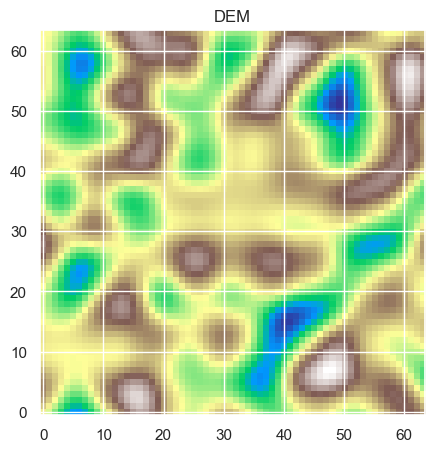

In [51]:
### using reshape function

def reshape_dem(dem_number):
    dem_path = f'raw_datasets/DEM/DEM_{dem_number}.txt'
    dem = np.loadtxt(dem_path)

    elevation = dem[:,2]

    dem = elevation.reshape((64,64))

    dem = torch.tensor(dem)
    return dem

In [55]:
#reshape_dem(1)

Text(0.5, 1.0, 'DEM')

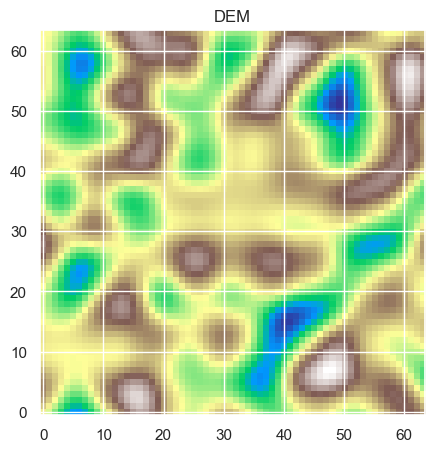

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.imshow(reshape_dem(1).cpu(), cmap='terrain', origin='lower')
axs.set_title('DEM')